## Thực hành các mô hình học máy

### regression để chuẩn đoán ranked của phim dựa trên trường Studios, Theme

chuẩn đoán rank là sai, vì rank bình thường đã được sort từ trên xuống nên không ổn
Chuẩn đoán score hợp lý hơn!
baseline sẽ là code của người ta nhưng chưa clean text, code mình là đã clean text

baseline là code của người ta nhưng sử dụng trường description. Còn của mình là sử dụng trường theme

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression


In [2]:
df = pd.read_csv('../../CrawlData/all_data/final_data_movie.csv')

In [3]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0']).reset_index(drop=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        3865 non-null   object 
 1   Genre        3808 non-null   object 
 2   Aired        3865 non-null   object 
 3   Licensors    3864 non-null   object 
 4   Studios      3865 non-null   object 
 5   Theme        3865 non-null   object 
 6   Ranked       3865 non-null   int64  
 7   Demographic  3865 non-null   object 
 8   Source       3865 non-null   object 
 9   Broadcast    3865 non-null   object 
 10  Members      3865 non-null   int64  
 11  Favorites    3865 non-null   int64  
 12  Episodes     3865 non-null   int64  
 13  Type         3865 non-null   object 
 14  Producers    3865 non-null   object 
 15  Popularity   3865 non-null   int64  
 16  Duration     3865 non-null   object 
 17  Rating       3860 non-null   object 
 18  Premiered    3865 non-null   object 
 19  Status

#! sử dụng regression để chuẩn đoán ranked dựa trên nội dung phim, Theme, Studios

In [5]:
# #! in Theme get all type of Theme
# mdict ={}
# for i in range(len(df['Theme'])):
#     if df['Theme'][i] in mdict:
#         mdict[df['Theme'][i]] += 1
#     else:
#         mdict[df['Theme'][i]] = 1
# mdict
df['Theme'] = df['Theme'].apply(lambda x: x.replace('all','Every'))

In [6]:
new_df = df[['Theme','Genre','Title']]

In [7]:
new_df['Theme']

0                                                   Every
1                                                Military
2       Psychological, Time , Time Travel, Time Travel...
3       Gag Humor, Gag HumorGag , Historical, Parody, ...
4                                Gore, Military, Survival
                              ...                        
3860                                                Every
3861                                                Every
3862       Historical, Martial Arts, Martial ArtsMartial 
3863                                             Military
3864                                                Every
Name: Theme, Length: 3865, dtype: object

In [8]:

### https://blog.ekbana.com/pre-processing-text-in-python-ad13ea544dae
def clean_text(text):
    #! to lower case:
    text = text.lower()
    #! delete all strange character
    text = re.sub('<[^<]+?>',' ',text)
    #! keep only character:
    text = re.sub(r"[^a-zA-Z+']",' ',text)
    #! keep word with length < len(tatsunokoproduction)
    text = re.sub(r"\b\w{1,len(tatsunokoproduction)}\b",' ',text)
    #! remove all stopword:
    stopwords = nltk.corpus.stopwords.words('english')
    #print(stopwords)
    #! remove stopword
    words = nltk.word_tokenize(text)
    #print(words)
    text = " ".join([i for i in words if i not in stopwords])
    if len(text) > 100:
        return 'long'
    return text
clean_text("<h1>myself HELLO WORLD</h1>")

'hello world'

In [9]:
df.head(3)

,Title,Genre,Aired,Licensors,Studios,Theme,Ranked,Demographic,Source,Broadcast,...,Episodes,Type,Producers,Popularity,Duration,Rating,Premiered,Status,score,review_film
0,Frieren: Beyond Journey's End,"Adventure, Drama, Fantasy","Sep 29, 2023 to Mar 22, 2024",葬送のフリーレン,Madhouse,Every,1,Shounen,Manga,Fridays at 23:00 (JST),...,28,TV,"Aniplex, Dentsu, Shogakukan-Shueis...",277,24 min. per ep.,PG-13 - Teens 13 or older,Fall 2023,Finished Airing,9.37,During their decade-long quest to defeat the D...
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy","Apr 5, 2009 to Jul 4, 2010",鋼の錬金術師 FULLMETAL ALCHEMIST,Bones,Military,2,Shounen,Manga,"Sundays at 17:00 (JST) ', 'Aniplex, ...",...,64,TV,"Aniplex, Square Enix, Mainichi Bro...",3,24 min. per ep.,R - 17+ (violence & profanity),Spring 2009,Finished Airing,9.09,After a horrific alchemy experiment goes wrong...
2,Steins;Gate,"Drama, Sci-Fi, Suspense","Apr 6, 2011 to Sep 14, 2011",STEINS;GATE,White Fox,"Psychological, Time , Time Travel, Time Travel...",3,All,Visual novel,Wednesdays at 02:05 (JST),...,24,TV,"Frontier Works, Media Factory, Kad...",13,24 min. per ep.,PG-13 - Teens 13 or older,Spring 2011,Finished Airing,9.07,Eccentric scientist Rintarou Okabe has a never...


In [10]:
new_df['Genre'] = new_df['Genre'].astype(str)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30080\595539929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Genre'] = new_df['Genre'].astype(str)


In [11]:
new_df['Theme'] = new_df['Theme'].apply(clean_text)
new_df['Genre'] = new_df['Genre'].apply(clean_text)
new_df['Title'] = new_df['Title'].apply(clean_text)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30080\2060054774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Theme'] = new_df['Theme'].apply(clean_text)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30080\2060054774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Genre'] = new_df['Genre'].apply(clean_text)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30080\2060054774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [12]:
new_df['Title']

0         frieren beyond journey 's end
1       fullmetal alchemist brotherhood
2                           steins gate
3                        gintama season
4              attack titan season part
                     ...               
3860                    fabulous beasts
3861         absolute boy zettai shonen
3862             peak true martial arts
3863                       purple river
3864        sunday without god memories
Name: Title, Length: 3865, dtype: object

In [13]:
x_train_rank, x_test_rank,y_train_rank, y_test_rank = train_test_split(new_df,df['score'],random_state=42,test_size=0.2)

In [14]:
x_train_rank.to_csv('../WebApp/csv_file/x_train_score.csv') #! Dòng này có liên quan tới deploy model lên web

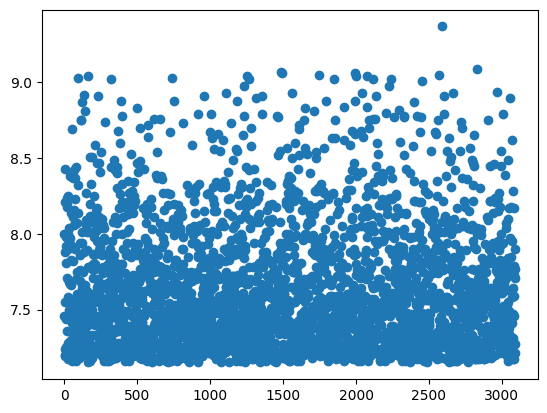

In [15]:
#! nhìn qua data để làm regression
x = [i for i in range(len(y_train_rank))]
plt.scatter(x,y_train_rank)

In [16]:
#! preprocess text_data:
# Initialize the TF-IDF vectorizer
# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
### https://viblo.asia/p/predict-independent-values-with-text-data-using-linear-regression-aWj5314eZ6m
from sklearn.feature_extraction import DictVectorizer
enc = DictVectorizer()
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
# Fit and transform the training data
X_train = enc.fit_transform(x_train_rank[['Theme','Genre','Title']].to_dict('records'))

# Transform the test data


In [17]:
X_train

<3092x3794 sparse matrix of type '<class 'numpy.float64'>'
	with 9276 stored elements in Compressed Sparse Row format>

In [18]:
#! cần convert ra float thì mới dùng được polynomialFeatures
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2)
# poly.fit_transform(x_train_rank[['Theme','Studios']])

In [19]:
x_test = enc.transform(x_test_rank[['Theme','Genre','Title']].to_dict('records'))

In [20]:
from sklearn.linear_model import Ridge,Lasso,BayesianRidge,LassoLars
model = LinearRegression()

#! Ridge:  'auto' or 'lsqr', 'sparse_cg', 'sag', 'lbfgs' or set `fit_intercept=False`
#! auto sẽ phù hợp với dữ liệu đưa vào tương ứng
model2 = Ridge(solver='auto',alpha=2,fit_intercept=True) #! alpha: tham số để làm việc với phần regularization
model3 = Lasso(alpha=1)
model4 = LassoLars(alpha=0.1)
model.fit(X_train,y_train_rank)

#! để update model2, qua việc nhìn bộ dữ liệu test -> Thấy nó vô cùng thưa thớt
model2.fit(X_train,y_train_rank) #! https://scikit-learn.org/stable/modules/linear_model.html#multi-task-lasso
model3.fit(X_train,y_train_rank)
# model4.fit(X_train,y_train_rank)

Lasso(alpha=1)

In [21]:
# text1 = "manga"
# text2 = "studio"
# df_temp = pd.DataFrame({'h': text1.split(" "), 'i': text2.split(" ")})
# a = model.predict( enc.transform(df_temp.to_dict("records")))
# #print((text1.split(" ")))

In [22]:
pred = model.predict(x_test)
print("Linear Regression R2 score: ",metrics.r2_score(y_true=y_test_rank, y_pred=pred))
pred2 = model2.predict(x_test)
print("Ridge Regression R2 score: ", metrics.r2_score(y_true=y_test_rank, y_pred=pred2)) 
pred3 = model3.predict(x_test)
print("Lasso Regression R2 score: ",metrics.r2_score(y_true=y_test_rank, y_pred=pred3))


Linear Regression R2 score:  0.07100065436313696
Ridge Regression R2 score:  0.22332829035745927
Lasso Regression R2 score:  -0.0024099372775341354


In [23]:
# text1 = "school"
# text2 = "comedy"
# text3 = "tanaka listless today"
# 7.5357985

#text1 = "Music"
#text2 = "Drama"
#text3 = "Hibike! Euphonium ss3"
text1 = "school"
text2 = "comedy"
text3 = "tanaka listless today"
#! x_test = enc.transform(x_test_rank[['Theme','Genre','Title']].to_dict('records'))
df_temp = pd.DataFrame({'Theme': [text1], 'Genre': [text2], 'Title': [text3]})
model2.predict(enc.transform(df_temp.to_dict("records")))

array([7.53581323])

### Biểu đồ predict của các model

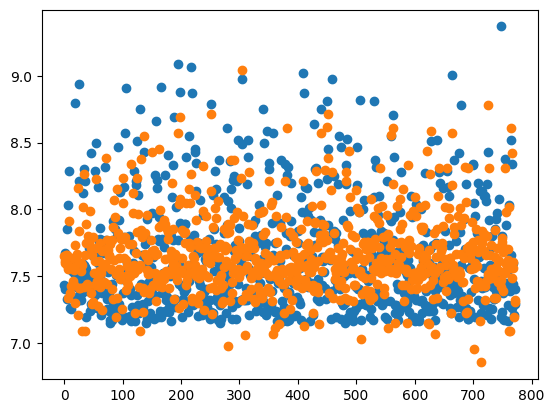

In [24]:
x = [i for i in range(len(y_test_rank))]
plt.scatter(x,y_test_rank)
plt.scatter(x,pred)

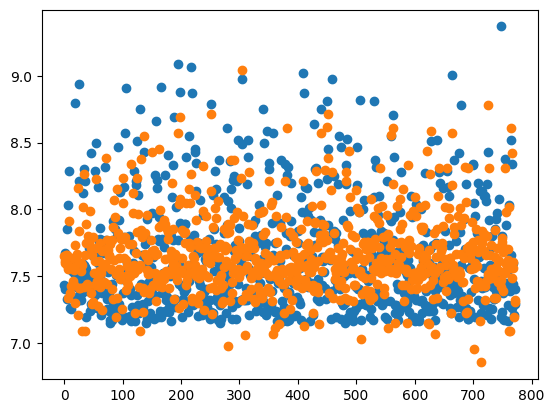

In [25]:
y = [i for i in range(len(y_test_rank))]
plt.scatter(y,y_test_rank)

plt.scatter(y,pred)

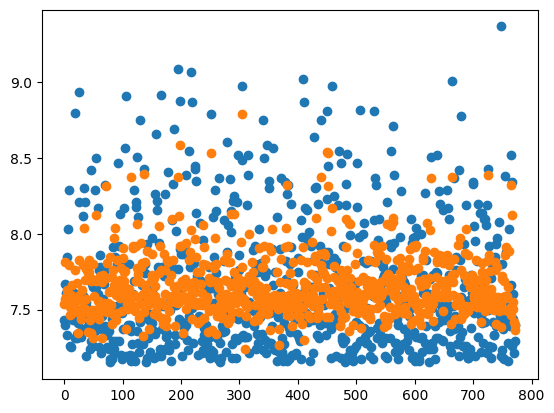

In [26]:
y = [i for i in range(len(y_test_rank))]
plt.scatter(y,y_test_rank)

plt.scatter(y,pred2)


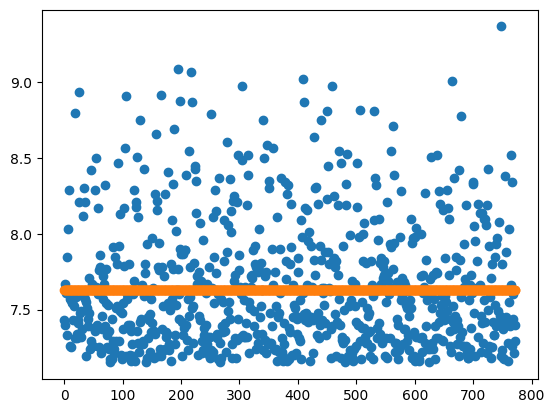

In [27]:
y = [i for i in range(len(y_test_rank))]
plt.scatter(y,y_test_rank)

plt.scatter(y,pred3)

#! từ đây rút ra kết luận lasso là tệ nhất trong số các trường hợp

In [28]:
from collections import defaultdict
my_dict = defaultdict(int)
for i in df['Duration']:
    if i in my_dict:
        my_dict[i] += 1
    else:
        my_dict[i] = 1

In [29]:
df['Premiered']

0             Fall 2023
1           Spring 2009
2           Spring 2011
3           Spring 2015
4           Spring 2019
             ...       
3860    to be anncouced
3861        Spring 2005
3862    to be anncouced
3863    to be anncouced
3864    to be anncouced
Name: Premiered, Length: 3865, dtype: object

In [30]:
import pickle
pickle.dump(model2,open('../WebApp/model/regression.pkl','wb'))